# Amazon Reviews

## Imports & Readings


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'/Users/paulbojan/Documents/TU Wien/2.Semester/Machine Learning/assignments/ex1/local'

In [10]:
amazon_train = pd.read_csv('datasets/review_train.csv')
amazon_test = pd.read_csv('datasets/review_test.csv')

In [13]:
#display(amazon_train)
print(amazon_train.shape)

amazon_train.head()

(750, 10002)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,17,4,8,8,9,4,0,2,3,...,0,0,0,0,0,0,0,1,1,Shea
1,1,21,9,5,8,6,2,16,3,12,...,0,0,0,2,2,1,0,1,0,Riley
2,2,9,7,6,3,8,2,9,4,4,...,0,0,0,0,0,0,0,1,1,Chachra
3,3,8,3,5,2,4,3,8,2,4,...,0,0,1,0,1,0,0,0,0,Agresti
4,4,15,8,8,4,7,8,4,7,1,...,0,0,0,0,0,0,0,0,0,Nigam


In [14]:
print(amazon_test.shape)

amazon_test.head()

(750, 10001)


,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,750,23,6,4,7,11,0,5,2,6,...,0,0,1,0,0,0,0,0,0,0
1,751,20,12,15,6,9,14,2,6,2,...,1,3,0,0,0,0,0,0,0,0
2,752,13,10,10,5,12,5,3,4,5,...,1,0,1,0,0,0,1,0,1,1
3,753,14,15,6,1,7,2,7,2,5,...,0,0,1,2,0,2,1,0,1,0
4,754,9,8,3,4,10,3,2,2,1,...,0,0,0,0,0,0,0,0,1,0


In [31]:
amazon_train.drop(['ID'], axis=1, inplace=True)
amazon_train.isna().sum().sum()


KeyError: "['ID'] not found in axis"

In [32]:
amazon_train['Class'].unique()

array(['Shea', 'Riley', 'Chachra', 'Agresti', 'Nigam', 'Messick', 'Cutey',
       'Mitchell', 'Ashbacher', 'Brody', 'Vernon', 'Goonan', 'Harp',
       'Lovitt', 'Corn', 'Engineer', 'Calvinnme', 'Chell', 'Comdet',
       'Kolln', 'Peterson', 'Dent', 'Wilson', 'Mark', 'Grove', 'Janson',
       'Brown', 'Auken', 'Sherwin', 'Cholette', 'McKee', 'Taylor',
       'Walters', 'Merritt', 'Blankenship', 'Chandler', 'Johnson',
       'Hayes', 'Koenig', 'CFH', 'Lawyeraau', 'Davisson', 'Mahlers2nd',
       'Power', 'Robert', 'Morrison', 'Lee', 'Neal', 'Bukowsky', 'Vision'],
      dtype=object)

In [20]:
from sklearn.decomposition import PCA

def perform_pca(data, n_components):
    # Create PCA object with the desired number of components
    pca = PCA(n_components=n_components)
    
    # Fit the PCA model to the data
    pca.fit(data)
    
    # Transform the data to the reduced dimensionality
    transformed_data = pca.transform(data)
    
    return transformed_data



# Perform PCA on the training data
X_train_pca = perform_pca(X_train, n_components=2)
X_train_pca = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2'])



## Approach Ideas:

PCA -> Sparse PCA!

LDA, QDA, RDA

multinomial logistic regression


We will try the Sparse PCA first. It seems promising!





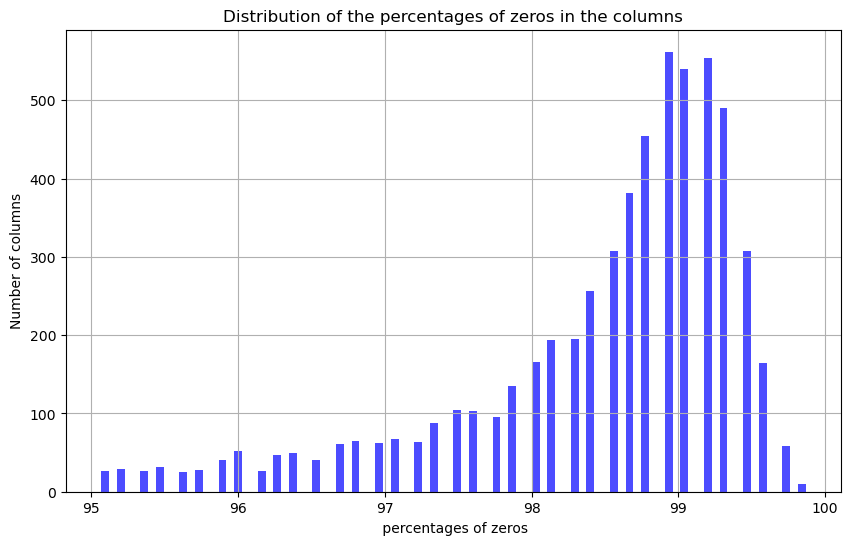

(5910, 2)

In [99]:
import pandas as pd

def column_with_zero(df, threshold = 95):
    results = []
    
    for col in df.columns:
        coun_zero = (df[col] == 0).sum()
        number_cols = len(df["Class"])

        percent_zero = (coun_zero / number_cols) * 100
        if percent_zero >= threshold:
            results.append({'Column Name': col, 'Percentage': percent_zero})
 
    result_df = pd.DataFrame(results)
    return result_df

df_temp = column_with_zero(amazon_train)

# PLot distribution
plt.figure(figsize=(10, 6))

plt.hist(df_temp['Percentage'], bins=90, color='blue', alpha=0.7)
plt.title('Distribution of the percentages of zeros in the columns')
plt.xlabel(' percentages of zeros')
plt.ylabel('Number of columns')
plt.grid(True)
plt.show()




df_temp.shape


In [38]:
amazon_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,17,4,8,8,9,4,0,2,3,5,...,0,0,0,0,0,0,0,1,1,Shea
1,21,9,5,8,6,2,16,3,12,6,...,0,0,0,2,2,1,0,1,0,Riley
2,9,7,6,3,8,2,9,4,4,5,...,0,0,0,0,0,0,0,1,1,Chachra
3,8,3,5,2,4,3,8,2,4,4,...,0,0,1,0,1,0,0,0,0,Agresti
4,15,8,8,4,7,8,4,7,1,3,...,0,0,0,0,0,0,0,0,0,Nigam


In [101]:
import pandas as pd
from sklearn.decomposition import SparsePCA

X = amazon_train.drop('Class', axis=1)  
y = amazon_train['Class']  

# number of components
n_components = 5

sparse_pca = SparsePCA(n_components=n_components, random_state=111)

#fit the model
transformed_data = sparse_pca.fit_transform(X)

transformed_df = pd.DataFrame(transformed_data, columns=[f'Component_{i+1}' for i in range(n_components)])

#Add target variable back 
transformed_df['Class'] = y

print(transformed_df.head())


   Component_1  Component_2  Component_3  Component_4  Component_5    Class
0   -18.728565    -2.020127    10.247295   -16.669304    23.554972     Shea
1    23.806106    41.796214   105.134683    -3.771703     1.172454    Riley
2   -57.908152    25.075320   -15.436117    -9.729442   -23.956176  Chachra
3   -25.967377    15.462059   -14.965175   -20.436362     7.077724  Agresti
4   -12.056590    15.961342    13.649013    30.253384    43.836749    Nigam


In [102]:
import pandas as pd
from sklearn.decomposition import PCA

X = amazon_train.drop('Class', axis=1)  
y = amazon_train['Class']  

# number of components
n_components = 20

pca = PCA(n_components=n_components, random_state=111)

#fit the model
transformed_data = pca.fit_transform(X)

pcs_df = pd.DataFrame(transformed_data, columns=[f'Component_{i+1}' for i in range(n_components)])

#Add target variable back 
pcs_df['Class'] = y

print(pcs_df.head())


   Component_1  Component_2  Component_3  Component_4  Component_5  \
0     3.771538     4.252988    -7.817311    10.002530    18.163779   
1  -126.142791    48.983971   -52.803613     2.483441    -1.148807   
2    77.670115    29.780364     4.925803    -3.529896    -4.264080   
3    35.742552    13.559204     5.977470    14.126095     4.496507   
4   -67.570083    13.948892    16.245660    -6.120800    23.154617   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0    -5.054403   -21.731939    -1.206129     4.192291      0.661723  ...   
1    23.187650     8.822139     2.425514     1.760027    -23.063005  ...   
2   -10.126593     1.599186     1.175034   -12.996084      3.111158  ...   
3     6.005512     9.341738    12.083370     4.714216     -6.263950  ...   
4    -5.389026    12.153532   -31.929311     8.861301     -4.605735  ...   

   Component_12  Component_13  Component_14  Component_15  Component_16  \
0     -9.566613     -7.261215      5.954220    

In [103]:
import pandas as pd
from sklearn.decomposition import SparsePCA

X = amazon_train.drop('Class', axis=1)  
y = amazon_train['Class']  

# number of components
n_components = 50

sparse_pca2 = SparsePCA(n_components=n_components, random_state=111)

#fit the model
transformed_data2 = sparse_pca2.fit_transform(X)

transformed_df2 = pd.DataFrame(transformed_data2, columns=[f'Component_{i+1}' for i in range(n_components)])

#Add target variable back 
transformed_df2['Class'] = y

print(transformed_df2.head())

KeyboardInterrupt: 

## Modelling

In [104]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def compare_methods(X_train, X_valid, y_train, y_valid, classifier_List):
    scores = {}

    for name, classifier in classifier_List.items():
        
        # Cross-Validation
        cv_scores = cross_val_score(classifier, X_train, y_train, cv=10)

        classifier.fit(X_train, y_train)
        predictions = classifier.predict(X_valid)
        
        # plot Matrix and table 
        #evaluate_model(y_test, predictions)
        
        scores[name] = {
            "cross_val_scores": cv_scores.mean(),
            "test_accuracy": accuracy_score(y_valid, predictions),
            "precision": precision_score(y_valid, predictions, average='weighted'),
            "recall": recall_score(y_valid, predictions, average='weighted'),
            "f1_score": f1_score(y_valid, predictions, average='weighted')
        }
        
    return scores



In [110]:
sparse_pca_df =  transformed_df.copy(deep=True) # Sparse PCA with 5 components
pcs_df.head() # PCA with 20 components
pca_df = pcs_df.copy(deep=True) # PCA with 50 components
sparse_pca_df.head()

,Component_1,Component_2,Component_3,Component_4,Component_5,Class
0,-18.728565,-2.020127,10.247295,-16.669304,23.554972,Shea
1,23.806106,41.796214,105.134683,-3.771703,1.172454,Riley
2,-57.908152,25.075320,-15.436117,-9.729442,-23.956176,Chachra
3,-25.967377,15.462059,-14.965175,-20.436362,7.077724,Agresti
4,-12.056590,15.961342,13.649013,30.253384,43.836749,Nigam


In [109]:
# Set of classifier to be used
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(),
    "Linear SVC": LinearSVC() #,
    #"MLP Classifier": MLPClassifier() # it dont work for any reason
    }


X_temp = sparse_pca_df.drop('Class', axis=1)
y_temp = sparse_pca_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scores_sparse_pca = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)
df_scores = pd.DataFrame(scores_sparse_pca).T # transfrom into df 

(df_scores.sort_values(by='test_accuracy', ascending=False))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

,cross_val_scores,test_accuracy,precision,recall,f1_score
Logistic Regression,0.184962,0.154255,0.141401,0.154255,0.137830
Gaussian Naive Bayes,0.138628,0.148936,0.223014,0.148936,0.143542
Random Forest Classifier,0.149467,0.143617,0.207763,0.143617,0.144939
Support Vector Classifier,0.193922,0.127660,0.095626,0.127660,0.099525
Decision Tree Classifier,0.122744,0.106383,0.120907,0.106383,0.101200
Gradient Boosting Classifier,0.101441,0.090426,0.107942,0.090426,0.084870
K-Nearest Neighbors,0.115727,0.085106,0.115663,0.085106,0.087153
Perceptron,0.035558,0.063830,0.014149,0.063830,0.022316
Linear SVC,0.048152,0.053191,0.011579,0.053191,0.018170
AdaBoost Classifier,0.049843,0.042553,0.034607,0.042553,0.021743


In [111]:
X_temp = pca_df.drop('Class', axis=1)
y_temp = pca_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scores_pca = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)
df_scores = pd.DataFrame(scores_pca).T # transfrom into df 

(df_scores.sort_values(by='test_accuracy', ascending=False))


/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

,cross_val_scores,test_accuracy,precision,recall,f1_score
Gaussian Naive Bayes,0.265069,0.271277,0.312981,0.271277,0.269741
Logistic Regression,0.280952,0.260638,0.332668,0.260638,0.264087
Random Forest Classifier,0.295363,0.244681,0.329149,0.244681,0.229817
Support Vector Classifier,0.204731,0.175532,0.203738,0.175532,0.149679
K-Nearest Neighbors,0.167231,0.143617,0.205281,0.143617,0.136339
Gradient Boosting Classifier,0.201128,0.138298,0.163994,0.138298,0.130347
Decision Tree Classifier,0.147682,0.127660,0.184207,0.127660,0.139565
Linear SVC,0.137030,0.117021,0.159243,0.117021,0.114614
AdaBoost Classifier,0.046272,0.021277,0.000967,0.021277,0.001840
Perceptron,0.028415,0.021277,0.027898,0.021277,0.011177


In [113]:
import pandas as pd
from sklearn.decomposition import PCA

X = amazon_train.drop('Class', axis=1)  
y = amazon_train['Class']  

# number of components
n_components = 200

pca = PCA(n_components=n_components, random_state=111)

#fit the model
transformed_data = pca.fit_transform(X)

pca_df = pd.DataFrame(transformed_data, columns=[f'Component_{i+1}' for i in range(n_components)])

#Add target variable back 
pca_df['Class'] = y

print(pca_df.head())


   Component_1  Component_2  Component_3  Component_4  Component_5  \
0     3.771538     4.252988    -7.817311    10.002531    18.163768   
1  -126.142791    48.983971   -52.803615     2.483441    -1.148803   
2    77.670115    29.780364     4.925802    -3.529897    -4.264080   
3    35.742552    13.559204     5.977470    14.126094     4.496509   
4   -67.570083    13.948892    16.245659    -6.120804    23.154644   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0    -5.054241   -21.731941    -1.206880     4.192185      0.661212  ...   
1    23.187653     8.822805     2.426974     1.762253    -23.065355  ...   
2   -10.126772     1.598913     1.175728   -12.996074      3.109875  ...   
3     6.005307     9.341852    12.085811     4.713573     -6.265416  ...   
4    -5.388831    12.153428   -31.933780     8.866520     -4.616293  ...   

   Component_192  Component_193  Component_194  Component_195  Component_196  \
0      -4.452643       0.165449      -2.30

In [114]:
X_temp = pca_df.drop('Class', axis=1)
y_temp = pca_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scores_pca = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)
df_scores = pd.DataFrame(scores_pca).T # transfrom into df 

(df_scores.sort_values(by='test_accuracy', ascending=False))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

,cross_val_scores,test_accuracy,precision,recall,f1_score
Logistic Regression,0.524969,0.590426,0.669238,0.590426,0.587147
Linear SVC,0.348904,0.356383,0.452054,0.356383,0.372779
Random Forest Classifier,0.233020,0.244681,0.323401,0.244681,0.240203
Support Vector Classifier,0.243860,0.234043,0.227830,0.234043,0.193551
Gaussian Naive Bayes,0.259806,0.234043,0.431099,0.234043,0.262445
K-Nearest Neighbors,0.233051,0.170213,0.213318,0.170213,0.159638
Perceptron,0.172682,0.143617,0.249016,0.143617,0.139288
Gradient Boosting Classifier,0.122964,0.090426,0.141495,0.090426,0.086363
Decision Tree Classifier,0.101566,0.074468,0.099702,0.074468,0.076901
AdaBoost Classifier,0.039160,0.021277,0.000980,0.021277,0.001863


In [115]:
import pandas as pd
from sklearn.decomposition import PCA

X = amazon_train.drop('Class', axis=1)  
y = amazon_train['Class']  

# number of components
n_components = 200

pca = PCA(n_components=n_components, random_state=111)

#fit the model
transformed_data = pca.fit_transform(X)

pca_df = pd.DataFrame(transformed_data, columns=[f'Component_{i+1}' for i in range(n_components)])

#Add target variable back 
pca_df['Class'] = y

print(pca_df.head())

   Component_1  Component_2  Component_3  Component_4  Component_5  \
0     3.771538     4.252988    -7.817311    10.002531    18.163768   
1  -126.142791    48.983971   -52.803615     2.483441    -1.148803   
2    77.670115    29.780364     4.925802    -3.529897    -4.264080   
3    35.742552    13.559204     5.977470    14.126094     4.496509   
4   -67.570083    13.948892    16.245659    -6.120804    23.154644   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0    -5.054241   -21.731941    -1.206880     4.192185      0.661212  ...   
1    23.187653     8.822805     2.426974     1.762253    -23.065355  ...   
2   -10.126772     1.598913     1.175728   -12.996074      3.109875  ...   
3     6.005307     9.341852    12.085811     4.713573     -6.265416  ...   
4    -5.388831    12.153428   -31.933780     8.866520     -4.616293  ...   

   Component_192  Component_193  Component_194  Component_195  Component_196  \
0      -4.452643       0.165449      -2.30

In [116]:
X_temp = pca_df.drop('Class', axis=1)
y_temp = pca_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scores_pca = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)
df_scores = pd.DataFrame(scores_pca).T # transfrom into df 

(df_scores.sort_values(by='test_accuracy', ascending=False))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

,cross_val_scores,test_accuracy,precision,recall,f1_score
Logistic Regression,0.524969,0.590426,0.669238,0.590426,0.587147
Linear SVC,0.361247,0.351064,0.445213,0.351064,0.356216
Support Vector Classifier,0.243860,0.234043,0.227830,0.234043,0.193551
Gaussian Naive Bayes,0.259806,0.234043,0.431099,0.234043,0.262445
Random Forest Classifier,0.245457,0.218085,0.210908,0.218085,0.187855
K-Nearest Neighbors,0.233051,0.170213,0.213318,0.170213,0.159638
Perceptron,0.172682,0.143617,0.249016,0.143617,0.139288
Decision Tree Classifier,0.106830,0.106383,0.133618,0.106383,0.108091
Gradient Boosting Classifier,0.115789,0.095745,0.137337,0.095745,0.086880
AdaBoost Classifier,0.042732,0.021277,0.000980,0.021277,0.001863


In [117]:
import pandas as pd
from sklearn.decomposition import SparsePCA

X = amazon_train.drop('Class', axis=1)  
y = amazon_train['Class']  

# number of components
n_components = 50

sparse_pca = SparsePCA(n_components=n_components, random_state=111)

#fit the model
transformed_data = sparse_pca.fit_transform(X)

transformed_df = pd.DataFrame(transformed_data, columns=[f'Component_{i+1}' for i in range(n_components)])

#Add target variable back 
transformed_df['Class'] = y

print(transformed_df.head())


   Component_1  Component_2  Component_3  Component_4  Component_5  \
0   -12.991579    -4.257283    15.680523    -8.111694    -7.805619   
1    18.103297   -18.706610    40.989118    43.231153    -1.085149   
2   -23.752729   -17.409279    -5.194998   -12.997958    -0.690276   
3    11.970953     0.030825   -10.743086    -9.504986    -3.911179   
4    11.069263    16.293165     8.459849    28.428720    40.368975   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0    -5.633683    19.193301    -1.674130     1.357969    -14.608687  ...   
1    -9.737684    -4.915006    -9.363754     4.696176      5.925235  ...   
2    -9.782083    -2.254201    17.953774   -11.977309     -6.769396  ...   
3    -1.587141    -8.112800     2.527937    -9.756407    -15.016664  ...   
4   -12.404117    13.315512     1.202819    -6.712590     -0.422797  ...   

   Component_42  Component_43  Component_44  Component_45  Component_46  \
0      1.244770      1.942826      4.552617    

In [118]:
X_temp = transformed_df.drop('Class', axis=1)
y_temp = transformed_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scores_pca = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)
df_scores = pd.DataFrame(scores_pca).T # transfrom into df 

(df_scores.sort_values(by='test_accuracy', ascending=False))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

,cross_val_scores,test_accuracy,precision,recall,f1_score
Random Forest Classifier,0.366573,0.430851,0.423415,0.430851,0.397765
Logistic Regression,0.389662,0.414894,0.525785,0.414894,0.420397
Gaussian Naive Bayes,0.352381,0.404255,0.441861,0.404255,0.395008
Support Vector Classifier,0.375313,0.398936,0.455273,0.398936,0.385839
Linear SVC,0.355702,0.361702,0.397880,0.361702,0.341585
K-Nearest Neighbors,0.245583,0.239362,0.312517,0.239362,0.233557
Gradient Boosting Classifier,0.197682,0.175532,0.249335,0.175532,0.174633
Decision Tree Classifier,0.135119,0.148936,0.178242,0.148936,0.140388
Perceptron,0.115695,0.095745,0.108865,0.095745,0.088838
AdaBoost Classifier,0.053383,0.042553,0.016318,0.042553,0.021339


In [132]:
import pandas as pd
from sklearn.decomposition import PCA

X = amazon_train.drop('Class', axis=1)  
y = amazon_train['Class']  

# number of components
n_components = 400

pca = PCA(n_components=n_components, random_state=111)

#fit the model
transformed_data = pca.fit_transform(X)

pca_df = pd.DataFrame(transformed_data, columns=[f'Component_{i+1}' for i in range(n_components)])

#Add target variable back 
pca_df['Class'] = y

print(pca_df.head())

   Component_1  Component_2  Component_3  Component_4  Component_5  \
0     3.771538     4.252988    -7.817311    10.002531    18.163768   
1  -126.142791    48.983971   -52.803615     2.483441    -1.148802   
2    77.670115    29.780364     4.925802    -3.529897    -4.264080   
3    35.742552    13.559204     5.977469    14.126094     4.496508   
4   -67.570083    13.948892    16.245659    -6.120803    23.154643   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0    -5.054240   -21.731941    -1.206883     4.192184      0.661214  ...   
1    23.187654     8.822804     2.426979     1.762250    -23.065362  ...   
2   -10.126772     1.598912     1.175724   -12.996069      3.109880  ...   
3     6.005306     9.341849    12.085810     4.713578     -6.265419  ...   
4    -5.388832    12.153424   -31.933780     8.866520     -4.616303  ...   

   Component_392  Component_393  Component_394  Component_395  Component_396  \
0      -0.582812      -2.406164       0.27

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.or

{LogisticRegression(): {'test_accuracy': 0.6063829787234043, 'precision': 0.6914197061803444, 'recall': 0.6063829787234043, 'f1_score': 0.6067590801633356}}


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


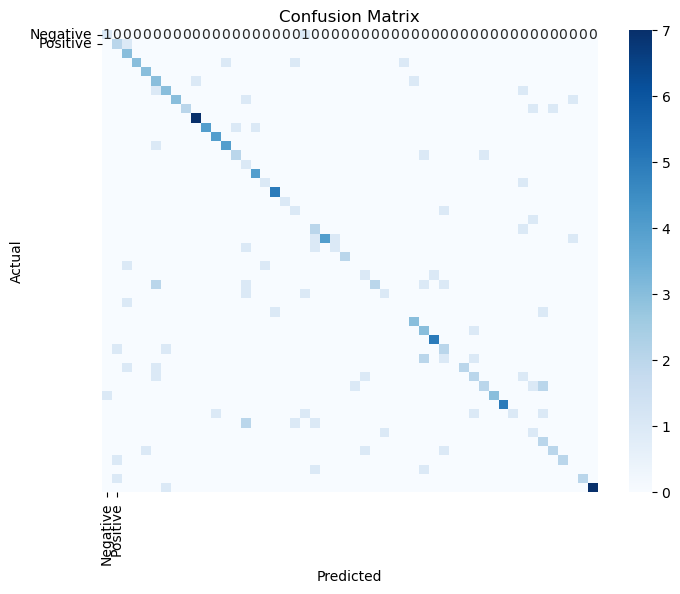

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 7]])

In [136]:
# Set of classifier to be used
classifiers = {
    "Logistic Regression": LogisticRegression()
    }


X_temp = pca_df.drop('Class', axis=1)
y_temp = pca_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scores = compare_methods(X_train, X_test, y_train, y_test, classifier_List=classifiers)
df_scores = pd.DataFrame(scores).T # transfrom into df 
df_scores

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

predictions = lr_classifier.predict(X_test)
        
scores = {}

     
scores[lr_classifier] = {
"test_accuracy": accuracy_score(y_test, predictions),
"precision": precision_score(y_test, predictions, average='weighted'),
"recall": recall_score(y_test, predictions, average='weighted'),
"f1_score": f1_score(y_test, predictions, average='weighted')
}

print(scores)


# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


plot_confusion_matrix(y_test, predictions)

cm = confusion_matrix(y_test, predictions)

cm
